In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [258]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [106]:
client = pd.read_csv("/content/client_data.csv")
price = pd.read_csv("/content/price_data.csv")

**Dataset `client`**: 14,606 records × 26 features  
**Dataset `price`**: 193,002 records × 8 features

In [107]:
client.shape

(14606, 26)

In [108]:
price.shape

(193002, 8)

# **Core Business Challenge**


The energy provider faces significant churn, impacting revenue,

We need to:

- **Identify** at-risk customers before they churn
- **Understand** the key drivers behind churn decisions


**Primary Hypothesis**:

Price sensitivity is a significant driver of customer churn, where:
- Customers experiencing price increases are more likely to churn
- Price volatility correlates with higher attrition rates
- Certain pricing periods (peak/off-peak) have stronger churn effects

#### Key Questions to Address

##### 1. Price Impact Analysis
- What is the elasticity of churn relative to price changes?
- Do certain price components (fixed vs. variable) have greater impact?
- How does price sensitivity vary by customer segment?

##### 2. Behavioral Patterns
- How do consumption trends differ between churning and loyal customers?
- What contract characteristics (duration, renewal timing) affect retention?
- Does product/service bundling reduce price sensitivity?

In [109]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.65,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.86,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.20,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.80,0


In [110]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.15,0.00,0.00,44.27,0.00,0.00
1,038af19179925da21a25619c5a24b745,2015-02-01,0.15,0.00,0.00,44.27,0.00,0.00
2,038af19179925da21a25619c5a24b745,2015-03-01,0.15,0.00,0.00,44.27,0.00,0.00
3,038af19179925da21a25619c5a24b745,2015-04-01,0.15,0.00,0.00,44.27,0.00,0.00
4,038af19179925da21a25619c5a24b745,2015-05-01,0.15,0.00,0.00,44.27,0.00,0.00


# **Exploratory Data Analysis**

**Client Dataset**

- id = client company identifier
- channel_sales = code of the sales channel
- cons_12m = electricity consumption of the past 12 months
- cons_gas_12m = gas consumption of the past 12 months
- cons_last_month = electricity consumption of the last month
- date_activ = date of activation of the contract
- date_end = registered date of the end of the contract
- date_modif_prod = date of the last modification of the product
- date_renewal = date of the next contract renewal
- forecast_cons_12m = forecasted electricity consumption for next 12 months
- forecast_cons_year = forecasted electricity consumption for the next calendar year
- forecast_discount_energy = forecasted value of current discount
- forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
- forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
- forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
- forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
- has_gas = indicated if client is also a gas
- imp_cons = current paid consumption
- margin_gross_pow_ele = gross margin on power subscription
- margin_net_pow_ele = net margin on power subscription
- nb_prod_act = number of active products and services
- net_margin = total net margin
- num_years_antig = antiquity of the client (in number of years)
- origin_up = code of the electricity campaign the customer first subscribed to
- pow_max = subscribed power
- churn = has the client churned over the next 3 months




In [111]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

**Price Dataset**

- id = client company identifier
- price_date = reference date
- price_off_peak_var = price of energy for the 1st period (off peak)
- price_peak_var = price of energy for the 2nd period (peak)
- price_mid_peak_var = price of energy for the 3rd period (mid peak)
- price_off_peak_fix = price of power for the 1st period (off peak)
- price_peak_fix = price of power for the 2nd period (peak)
- price_mid_peak_fix = price of power for the 3rd period (mid peak)

In [112]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


## **Univariate Analysis : Client Dataset**

**Churn**

Even a low churn rate (9.7%) can have a major financial impact if lost customers are high consumers.

In [113]:
client['churn'].value_counts().reset_index()

,churn,count
0,0,13187
1,1,1419


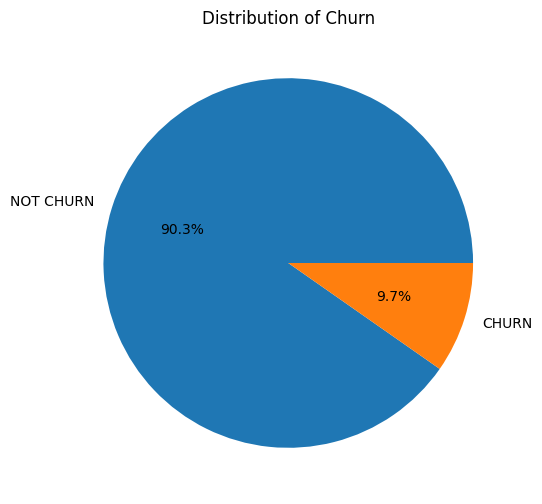

In [114]:
plt.figure(figsize=(6, 6))
plt.pie(client['churn'].value_counts(),labels=['NOT CHURN','CHURN'],autopct='%1.1f%%')
plt.title('Distribution of Churn')
plt.show()

**Channel Sales :**

Presence of Missing Values:  
   - A category labeled **"MISSING"** appears in the dataset, indicating that missing values have been replaced with this placeholder.

In [115]:
client['channel_sales'].value_counts()

,count
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,6754
MISSING,3725
lmkebamcaaclubfxadlmueccxoimlema,1843
usilxuppasemubllopkaafesmlibmsdf,1375
ewpakwlliwisiwduibdlfmalxowmwpci,893
sddiedcslfslkckwlfkdpoeeailfpeds,11
epumfxlbckeskwekxbiuasklxalciiuu,3
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [116]:
counts = client['channel_sales'].value_counts()
client['channel_sales'] = client['channel_sales'].apply(lambda x: x if counts[x] >= 20 else 'RARE')

- RARE represents only 0.11% of the dataset → extremely small portion → statistically negligible.

- RARE has a churn rate of 0.0% → no churn at all → no risk or special behavior detected.

- The global churn rate is 9.7% → meaning RARE is not only low-risk but also artificially lowers the variability in the dataset.

- Keeping RARE adds no value to the model or analysis, and could even introduce noise or bias in statistical tests like Chi².

In [117]:
rare_count = client[client['channel_sales'] == 'RARE'].shape[0]
total_count = client.shape[0]
rare_percentage = rare_count / total_count * 100
print(f"RARE représente {rare_percentage:.2f}% des données")

RARE représente 0.11% des données


In [118]:
rare_churn = client[client['channel_sales'] == 'RARE']['churn'].mean()
global_churn = client['churn'].mean()

print("Taux de churn RARE:", rare_churn)
print("Taux de churn global:", global_churn)

Taux de churn RARE: 0.0
Taux de churn global: 0.09715185540188963


In [119]:
client = client[client['channel_sales'] != 'RARE']

In [120]:
client['date_activ'] = pd.to_datetime(client['date_activ'])

<ipython-input-120-dce2c5349443>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client['date_activ'] = pd.to_datetime(client['date_activ'])


In [121]:
client['year_activation'] = client['date_activ'].dt.year
client['channel_sales_group'] = client['channel_sales'].apply(lambda x: x if x != 'MISSING' else 'MISSING')

<ipython-input-121-1449fb2d027f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client['year_activation'] = client['date_activ'].dt.year
<ipython-input-121-1449fb2d027f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client['channel_sales_group'] = client['channel_sales'].apply(lambda x: x if x != 'MISSING' else 'MISSING')


In [122]:
client['channel_sales_group'] = client.groupby('year_activation')['channel_sales'].transform(lambda x: x.value_counts().idxmax())

<ipython-input-122-b501349d4d29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client['channel_sales_group'] = client.groupby('year_activation')['channel_sales'].transform(lambda x: x.value_counts().idxmax())


In [123]:
client['ERA'] = pd.cut(client['year_activation'],
                       bins=[2000, 2005, 2010, 2015],
                       labels=['2000-2005', '2006-2010', '2011-2015'])

era_channel_crosstab = pd.crosstab(client['ERA'], client['channel_sales_group'], normalize='index')

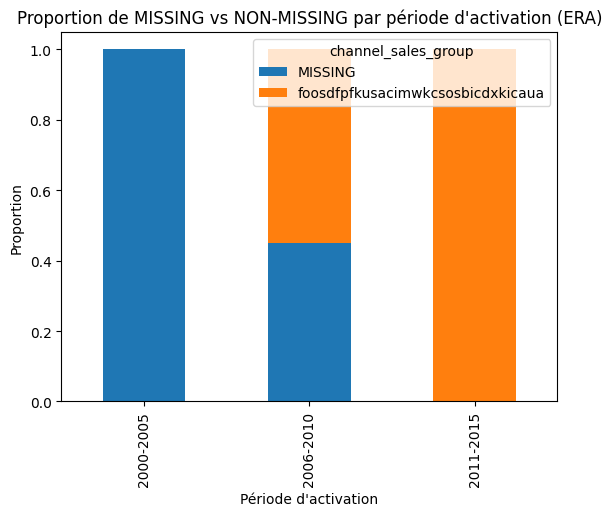

In [124]:
era_channel_crosstab.plot(kind='bar', stacked=True)
plt.title("Proportion de MISSING vs NON-MISSING par période d'activation (ERA)")
plt.xlabel("Période d'activation")
plt.ylabel("Proportion")
plt.show()

In [125]:
client['channel_sales'] = client['channel_sales'].replace({'MISSING': 'LEGACY_CLIENT'})

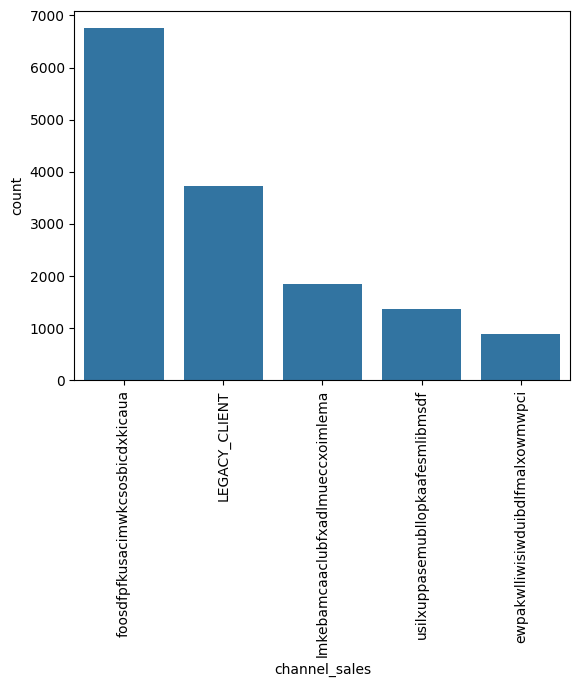

In [126]:
sns.countplot(x='channel_sales', data=client)
plt.xticks(rotation=90)
plt.show()

**has_gas :**
   - The largest portion of customers (81.8%) have a gas subscription.  
   - This suggests that gas services are highly adopted among clients.


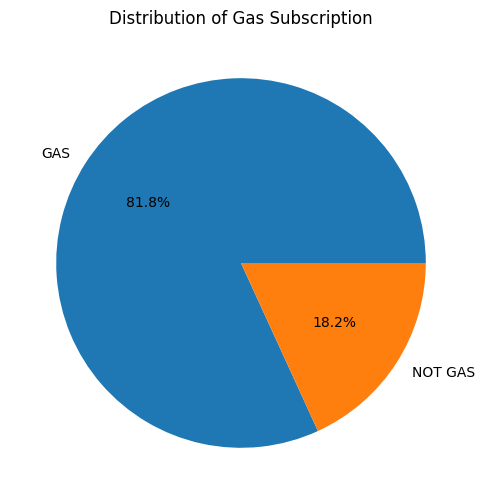

In [127]:
plt.figure(figsize=(6, 6))
plt.pie(client['has_gas'].value_counts(),labels=['GAS','NOT GAS'],autopct='%1.1f%%')
plt.title('Distribution of Gas Subscription')
plt.show()

**num_years_antig**

This suggests that most customers have been with the company for between 4 and 6 years. There are also some long-term customers who have been with the company for up to 13 years

In [128]:
client['num_years_antig'].describe()

,num_years_antig
count,14590.00
mean,5.00
std,1.61
min,1.00
25%,4.00
50%,5.00
75%,6.00
max,13.00


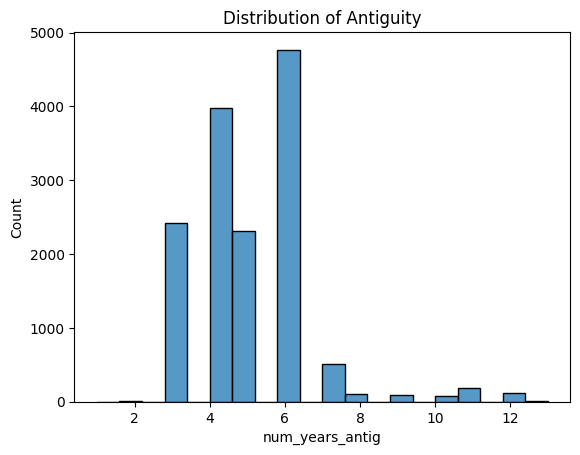

In [129]:
sns.histplot(client['num_years_antig'],bins=20)
plt.title('Distribution of Antiguity')
plt.show()

**nb_prod_act**

This suggests that most customers have 1 active product, but there are also some customers who have multiple active products, with a maximum of 32 active products



In [130]:
client['nb_prod_act'].value_counts().reset_index()

,nb_prod_act,count
0,1,11416
1,2,2444
2,3,523
3,4,150
4,5,31
5,9,11
6,6,8
7,8,4
8,10,2
9,32,1


**Origin_up**

The campaign lxidpiddsbxsbosboudacockeimpuepw was the most popular among customers, followed by kamkkxfxxuwbdslkwifmmcsiusiuosws and ldkssxwpmemidmecebumciepifcamkci

**MISSING :** For 64 customers, the campaign they first subscribed to is missing

In [131]:
client['origin_up'] = client['origin_up'].apply(lambda x: x if client['origin_up'].value_counts()[x] >= 10 else 'RARE')
client['origin_up'].value_counts()

,count
origin_up,
lxidpiddsbxsbosboudacockeimpuepw,7094
kamkkxfxxuwbdslkwifmmcsiusiuosws,4292
ldkssxwpmemidmecebumciepifcamkci,3137
MISSING,64
RARE,3


- RARE represents only 0.02% of the total dataset → statistically irrelevant in terms of volume.

- Churn rate within RARE :  0% churn no special or risky behavior.

- RARE adds no useful signal to the churn analysis, it only introduces statistical noise and bias in Chi² test.

- Keeping RARE will invalidate Chi² results due to extremely small expected frequencies.

In [132]:
rare_count = client[client['origin_up'] == 'RARE'].shape[0]
total_count = client.shape[0]
rare_percentage = rare_count / total_count * 100
print(f"RARE représente {rare_percentage:.2f}% des données")

RARE représente 0.02% des données


In [133]:
rare_churn_counts = client[client['origin_up'] == 'RARE']['churn'].value_counts(normalize=True)
print("Taux de churn chez les RARE:")
rare_churn_counts

Taux de churn chez les RARE:


,proportion
churn,
0,1.00


In [134]:
client = client[client['origin_up'] != 'RARE']
client = client[client['origin_up'] != 'MISSING']

**cons_12m**

- Residential: ≤ 40,000 kWh/year (aligned with your 75th percentile)

- Small Businesses: 40k–500k kWh/year

- Industrial/Large Consumers: ≥ 500k kWh/year (may represent 80% of total consumption despite being 0.1% of customers)


In [135]:
pd.set_option('display.float_format', '{:.2f}'.format)
client['cons_12m'].describe()

,cons_12m
count,14523.00
mean,159621.18
std,574498.36
min,0.00
25%,5675.50
50%,14118.00
75%,40768.50
max,6207104.00


**cons_gas_12m**

The columns shows highly skewed gas consumption, with 75% of customers having zero gas

In [136]:
client['cons_gas_12m'].describe()

,cons_gas_12m
count,14523.00
mean,28178.60
std,163374.84
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,4154590.00


**cons_last_month**

At least **25%** customers did not consume electricity last month

High Variability in Consumption (Std = 64,364.2)

Consumption varies widely, meaning customer behavior is unpredictable.

Some factors influencing this could be :

  - Industry differences (residential vs. industrial customers).

  - Seasonal demand (e.g., higher usage in summer or winter).



In [137]:
client['cons_last_month'].describe()

,cons_last_month
count,14523.00
mean,16128.21
std,64479.04
min,0.00
25%,0.00
50%,794.00
75%,3383.00
max,771203.00


## **Multivariate Analysis : Client Dataset**

**channel_sales vs churn**

🔹 foosdfpfkusacimwkcsosbicdxkicaua

  - Largest sales channel with 6,754 clients.

  - 820 clients churned, resulting in a churn rate of 12.1%.

  - High churn volume and high churn rate — requires in-depth analysis.

🔹 MISSING

  - Represents clients with an undefined or missing sales channel.

  - 3,725 clients total, with 283 churned.

  - Churn rate of 7.6% — could indicate data quality issues or hidden patterns.

🔹 usilxuppasemubllopkaafesmlibmsdf

  - Medium-sized channel with 1,375 clients.

  - Churn rate of 10.0% — relatively high, possibly problematic channel.

🔹 lmkebamcaaclubfxadlmueccxoimlema

   - 1,843 clients total, 103 churned.

   - Churn rate of 5.6% — lower risk compared to others.

🔹 ewpakwlliwisiwduibdlfmalxowmwpci

   - 893 clients, 75 churned.

   - Churn rate of 8.4% — moderate churn level, worth monitoring.

🔹 Minor channels with no churn:

  - sddiedcslfslkckwlfkdpoeeailfpeds — 11 clients.

  - epumfxlbckeskwekxbiuasklxalciiuu — 3 clients.

  - fixdbufsefwooaasfcxdxadsiekoceaa — 2 clients.

  - All have 0% churn, but due to very low volume, their impact is minimal.


| channel_sales                           | has_churn | not_churn | total_clients | churn_rate (%) |
|-----------------------------------------|-----------|-----------|----------------|----------------|
| `foosdfpfkusacimwkcsosbicdxkicaua`      |    820    |   5934    |      6754      |     12.1%      |
| `MISSING`                               |    283    |   3442    |      3725      |     7.6%       |
| `usilxuppasemubllopkaafesmlibmsdf`      |    138    |   1237    |      1375      |     10.0%      |
| `lmkebamcaaclubfxadlmueccxoimlema`      |    103    |   1740    |      1843      |     5.6%       |
| `ewpakwlliwisiwduibdlfmalxowmwpci`      |     75    |    818    |       893      |     8.4%       |
| `sddiedcslfslkckwlfkdpoeeailfpeds`      |      0    |     11    |        11      |     0.0%       |
| `epumfxlbckeskwekxbiuasklxalciiuu`      |      0    |      3    |         3      |     0.0%       |
| `fixdbufsefwooaasfcxdxadsiekoceaa`      |      0    |      2    |         2      |     0.0%       |



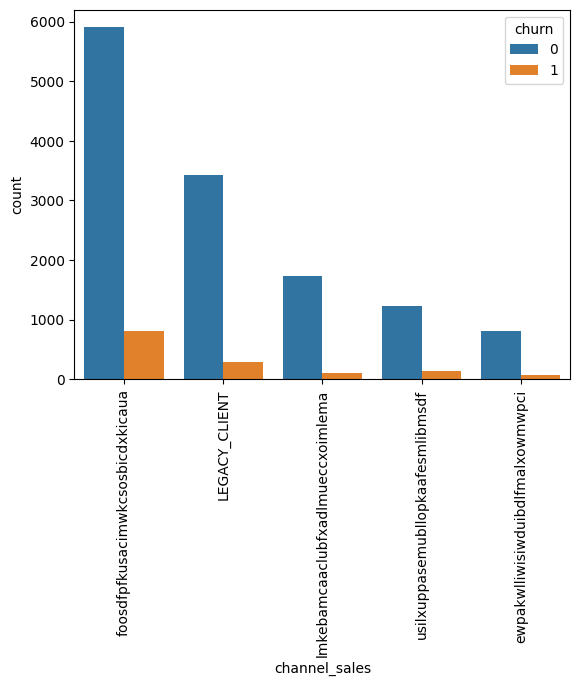

In [138]:
sns.countplot(data=client, x="channel_sales", hue="churn")
plt.xticks(rotation=90)
plt.show()

**has_gas vs churn**


Clients without gas subscription (has_gas = f):

  - Churn rate = 10%

  - These clients are slightly more likely to churn.

Clients with gas subscription (has_gas = t):

  - Churn rate = 8%

  - These clients show a lower churn rate, which may indicate greater loyalty or satisfaction due to bundled energy services.



In [139]:
client.groupby('has_gas')['churn'].mean().reset_index()

,has_gas,churn
0,f,0.10
1,t,0.08


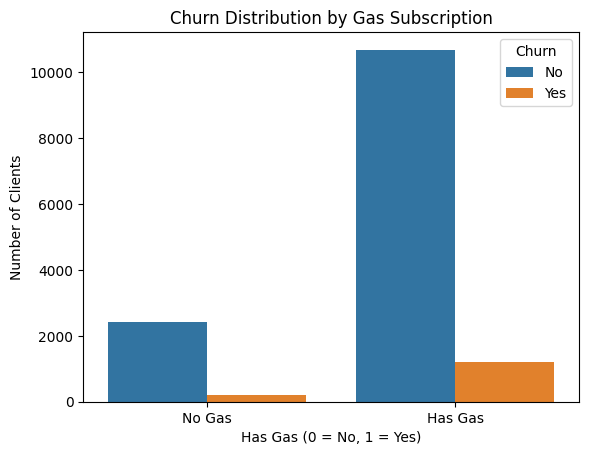

In [140]:
sns.countplot(data=client, x='has_gas', hue='churn')
plt.title("Churn Distribution by Gas Subscription")
plt.xlabel("Has Gas (0 = No, 1 = Yes)")
plt.ylabel("Number of Clients")
plt.xticks([0, 1], ["No Gas", "Has Gas"])
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

**num_years_antig vs churn**

- New customers (Year 1) leave the most—about 27% churn.

- After the first year, churn drops quickly (down to around 9% by Year 4).

- From Years 5–7, churn stays low (7–8%).

- At Year 8 it hits a very low point (about 1%), but that may just be because there aren’t many customers that old.

- After Year 8, churn ticks up a bit (around 5–6%) and even spikes at Year 12 (about 10%), again likely due to very small groups where a few people leave makes the rate jump

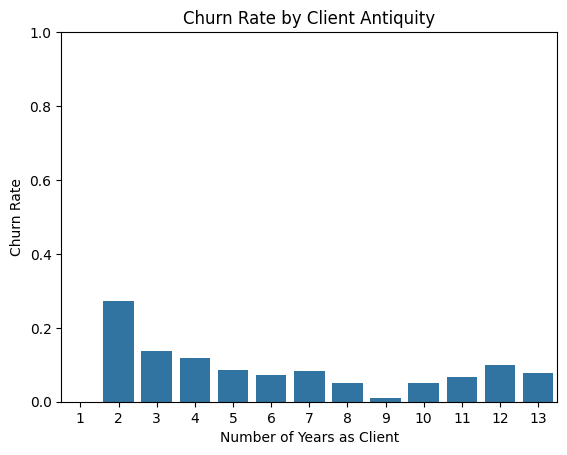

In [141]:
churn_rate = client.groupby('num_years_antig')['churn'].mean().reset_index()
sns.barplot(data=churn_rate, x='num_years_antig', y='churn')
plt.title("Churn Rate by Client Antiquity")
plt.xlabel("Number of Years as Client")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.show()

**origin_up vs churn**

 - lxidpiddsbxsbosboudacockeimpuepw has the highest churn (~12.5%)
 - ldkssxwpmemidmecebumciepifcamkci has around 8.5% churn
 - These are customers with no known source
 - kamkkxfxxuwbdslkwifmmcsiusiuosws and ewxeelcelemmiwuafmddpobolfuxioce have around 6% churn
 - usapbepcfoloekilkwsdiboslwaxobdp has 0% churn


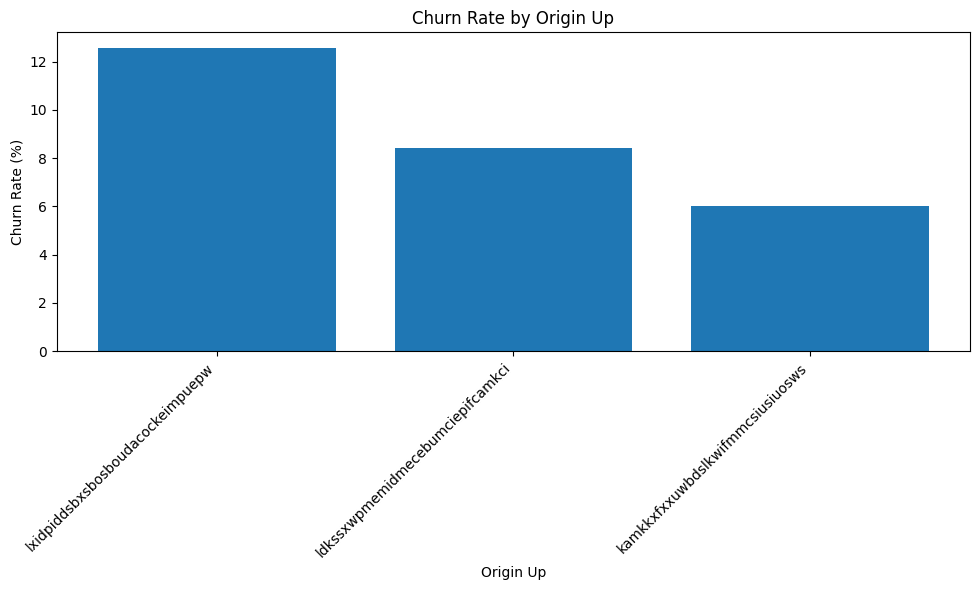

In [142]:
df = client.groupby('origin_up')['churn'].mean().sort_values(ascending=False).reset_index()
df['churn_pct'] = df['churn'] * 100
plt.figure(figsize=(10, 6))
plt.bar(df['origin_up'], df['churn_pct'])
plt.xlabel('Origin Up')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Origin Up')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**nb_prod_act vs churn**

- Most clients who churn have only 1 active product.

- As the number of active products increases, churn drops significantly.

- Churn is rare or almost zero when a client has 4 or more products

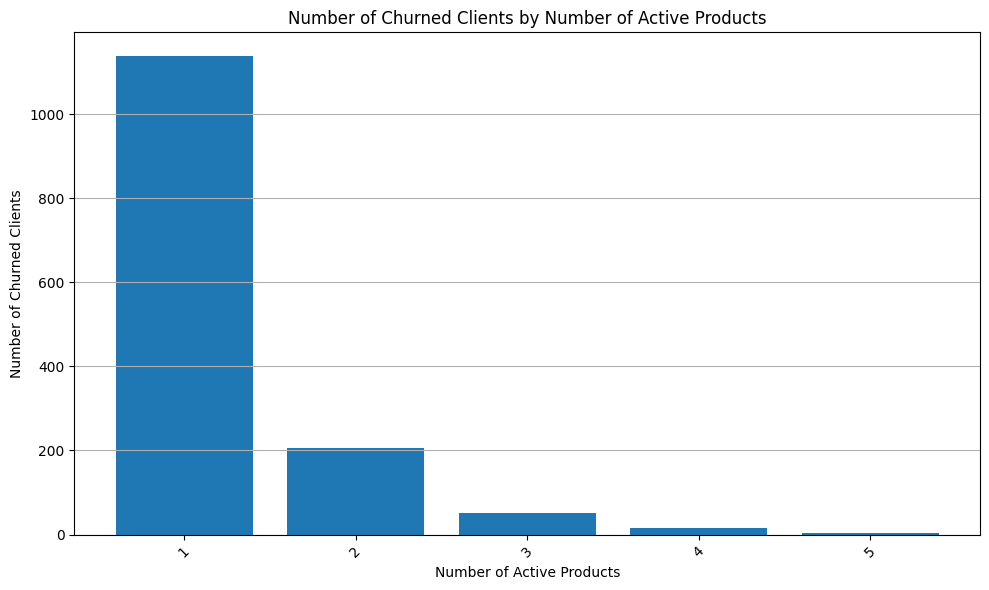

In [143]:
df_churn = client[client['churn'] == 1]
result_churn = df_churn.groupby('nb_prod_act')[['churn']].count().rename(columns={'churn': 'churn_count'}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(result_churn['nb_prod_act'].astype(str), result_churn['churn_count'])
plt.title('Number of Churned Clients by Number of Active Products')
plt.xlabel('Number of Active Products')
plt.ylabel('Number of Churned Clients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**cons_12m vs churn**

- Customers who did not churn consume more than twice as much electricity on average compared to those who did churn.

- This suggests a negative relationship: the lower the consumption, the higher the chance of churn

In [144]:
moyennes = client.groupby('churn')['cons_12m'].mean()

print("Consommation moyenne (en kWh) selon churn :")
print(f"- Clients NON churnés (churn = 0) : {moyennes[0]:,.2f} kWh")
print(f"- Clients churnés (churn = 1)     : {moyennes[1]:,.2f} kWh")

Consommation moyenne (en kWh) selon churn :
- Clients NON churnés (churn = 0) : 168,325.32 kWh
- Clients churnés (churn = 1)     : 78,989.55 kWh


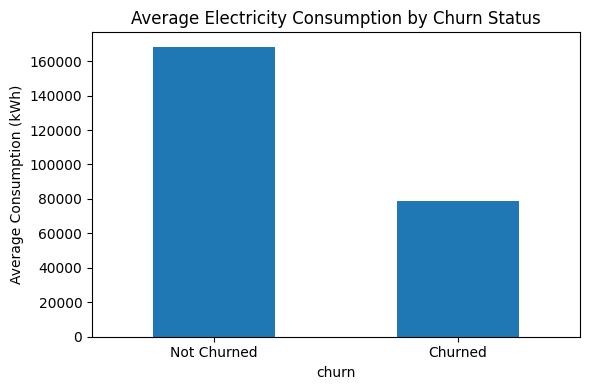

In [145]:
avg_consumption = client.groupby('churn')['cons_12m'].mean()

plt.figure(figsize=(6, 4))
avg_consumption.plot(kind='bar')

plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Average Consumption (kWh)')
plt.title('Average Electricity Consumption by Churn Status')
plt.tight_layout()
plt.show()

**cons_gas_12m vs churn**

- Customers who did not churn consume more than twice as much gas on average compared to those who did churn.

- This suggests a negative relationship: the lower the consumption, the higher the chance of churn

In [146]:
avg_gas = client.groupby('churn')['cons_gas_12m'].mean()

print("Average gas consumption over 12 months:")
print(f"- Not churned (0): {avg_gas[0]:,.2f} kWh")
print(f"- Churned (1): {avg_gas[1]:,.2f} kWh")

Average gas consumption over 12 months:
- Not churned (0): 30,221.25 kWh
- Churned (1): 9,256.28 kWh


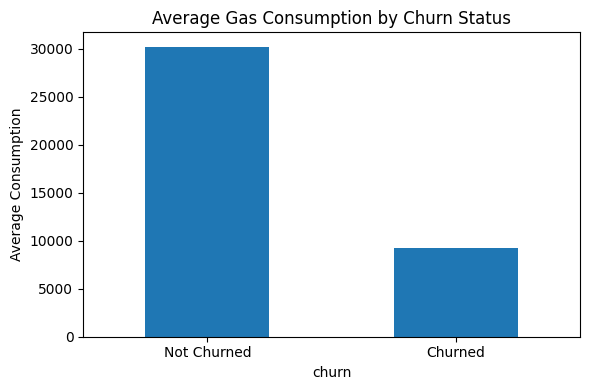

In [147]:
avg_consumption = client.groupby('churn')['cons_gas_12m'].mean()

plt.figure(figsize=(6, 4))
avg_consumption.plot(kind='bar')

plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Average Consumption')
plt.title('Average Gas Consumption by Churn Status')
plt.tight_layout()
plt.show()

**cons_last_month vs churn**

 - Clients who did not churn consumed much more electricity during the last month.

 - Clients who churned had lower average consumption.

In [148]:
moyennes = client.groupby('churn')['cons_last_month'].mean()
print(f"Not churned (0): {moyennes[0]:,.2f} kWh")
print(f"Churned     (1): {moyennes[1]:,.2f} kWh")

Not churned (0): 17,090.26 kWh
Churned     (1): 7,216.08 kWh


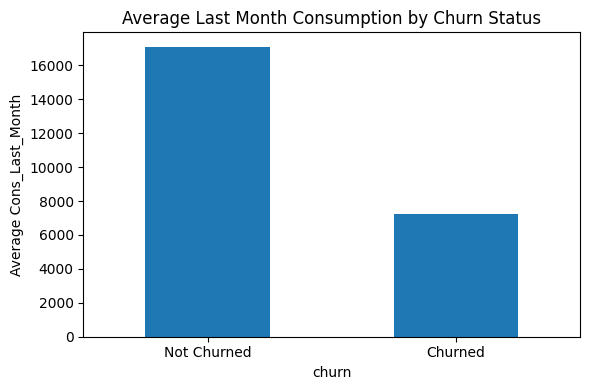

In [149]:
avg_consumption = client.groupby('churn')['cons_last_month'].mean()

plt.figure(figsize=(6, 4))
avg_consumption.plot(kind='bar')

plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Average Cons_Last_Month')
plt.title('Average Last Month Consumption by Churn Status')
plt.tight_layout()
plt.show()

**margin_gross_pow_ele, margin_net_pow_ele, net_margin vs churn**

- We usually expect low-margin clients to churn, but here, profitable clients are the ones leaving

- net_margin shows the largest gap, suggesting it may be more closely related to churn than the others

In [150]:
margins = ['net_margin', 'margin_net_pow_ele', 'margin_gross_pow_ele']

for col in margins:
    avg = client.groupby('churn')[col].mean()
    print(f"{col} → Not churned: {avg[0]:,.2f} | Churned: {avg[1]:,.2f}")


net_margin → Not churned: 184.66 | Churned: 228.17
margin_net_pow_ele → Not churned: 23.90 | Churned: 30.46
margin_gross_pow_ele → Not churned: 23.91 | Churned: 30.46


**date_activ,date_end,date_modif_prod,date_renewal vs churn**

In [151]:
client['date_activ'] = pd.to_datetime(client['date_activ'])
client['date_end'] = pd.to_datetime(client['date_end'])
client['date_modif_prod'] = pd.to_datetime(client['date_modif_prod'])
client['date_renewal'] = pd.to_datetime(client['date_renewal'])

**duration_contract** : Customers with longer contracts are less likely to churn

In [152]:
client['duration_contract'] = (client['date_end'] - client['date_activ']).dt.days

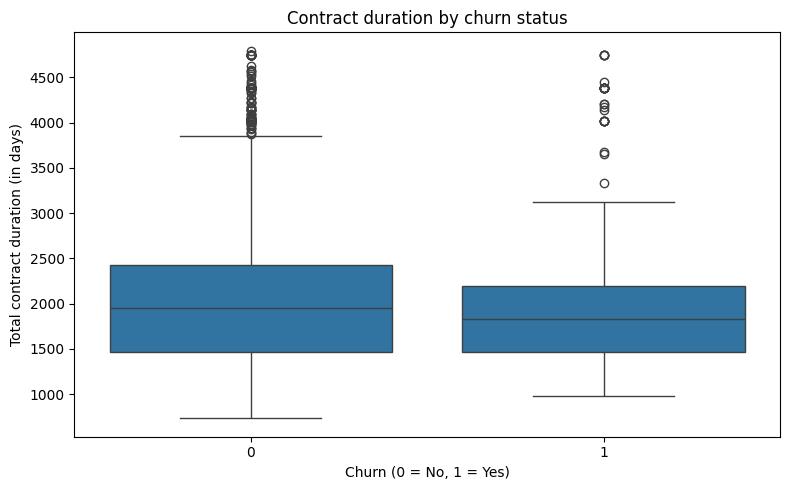

In [153]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='duration_contract', data=client)
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Total contract duration (in days)')
plt.title('Contract duration by churn status')
plt.tight_layout()
plt.show()

**time_before_modification :**
- Early modifications in the contract are more associated with churn.

- Clients who stick longer without changing their plan tend to stay.

In [154]:
client['time_before_modification'] = (client['date_modif_prod'] - client['date_activ']).dt.days

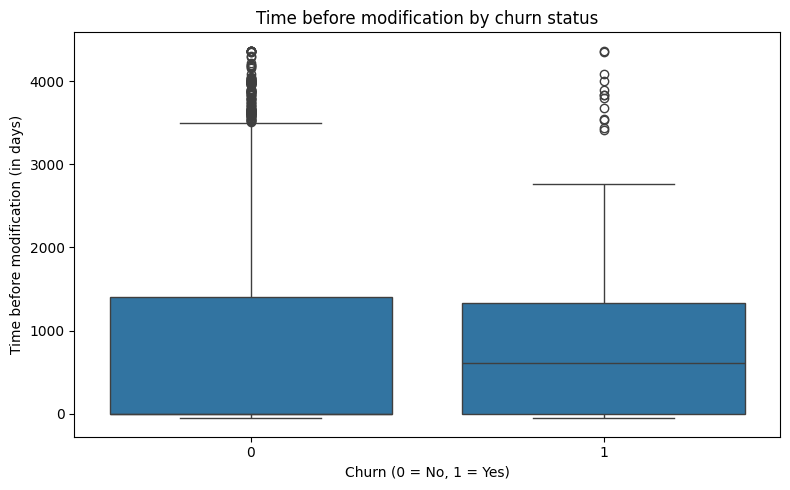

In [155]:
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='time_before_modification', data=client)
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Time before modification (in days)')
plt.title('Time before modification by churn status')
plt.tight_layout()
plt.show()

**time_after_modification :**

A long time after modification = the client is likely to stay.

A short time after modification = the client is more likely to churn.

In [156]:
client['time_after_modification'] = client['date_end'] - client['date_modif_prod']

In [157]:
client[['time_after_modification','churn']].groupby('churn').agg(['mean','median','min','max'])

time_after_modification                            
                              mean    median     min       max
churn                                                         
0     1320 days 06:43:23.600854448 1096 days 30 days 4749 days
1     1153 days 08:09:29.893992928  949 days 43 days 4749 days

**margin_gross_pow_ele, margin_net_pow_ele, net_margin vs churn**

- Churners generate a higher gross margin on average
- Churners have higher margins even after costs
- Some churners are very high-value clients

In [158]:
client.groupby('churn')[['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']].agg(['mean', 'median', 'min', 'max'])

margin_gross_pow_ele                    margin_net_pow_ele              \
                      mean median  min    max               mean median  min   
churn                                                                          
0                    23.91  21.48 0.00 374.64              23.90  21.48 0.00   
1                    30.46  26.04 0.00 299.64              30.46  26.04 0.00   

             net_margin                       
         max       mean median  min      max  
churn                                         
0     374.64     184.66 111.81 0.00 10203.50  
1     299.64     228.17 121.86 0.00 24570.65


**forecast_cons_12m, forecast_cons_year vs churn**

- Consumption forecasts alone show small differences between churners and non-churners.

- Extreme consumers (very high forecast) are more loyal.

- Forecast alone will probably not strongly predict churn.

In [159]:
client.groupby('churn')[['forecast_cons_12m', 'forecast_cons_year']].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

forecast_cons_12m                                       \
                   mean  median     std  min      max  count   
churn                                                          
0               1854.32 1107.13 2310.73 0.00 82902.83  13108   
1               1959.82 1152.35 2755.95 0.00 61357.17   1415   

      forecast_cons_year                                    
                    mean median     std min     max  count  
churn                                                       
0                1397.78 313.00 3274.14   0  175375  13108  
1                1369.73 322.00 2690.05   0   37891   1415


**forecast_meter_rent_12m vs churn**

- Clients with high costs (high rent charges) might churn because of the cost pressure (not because they use less, but because they find it too expensive)

- The rent price could be perceived as too high, making them leave even if they are active clients

- Big variability in forecasted rents, meaning many different client profiles

- **high rent cost = dissatisfaction = churn**

In [160]:
client.groupby('churn')['forecast_meter_rent_12m'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

,mean,median,std,min,max,count
churn,,,,,,
0,62.13,18.66,65.52,0.00,599.31,13108
1,72.00,19.97,70.83,0.00,548.41,1415


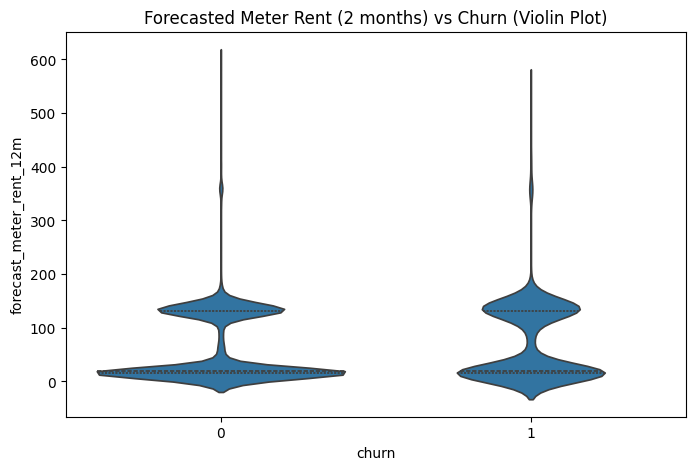

In [161]:
plt.figure(figsize=(8,5))
sns.violinplot(x='churn', y='forecast_meter_rent_12m', data=client, inner='quartile')
plt.title('Forecasted Meter Rent (2 months) vs Churn (Violin Plot)')
plt.show()

##**Price Data Analysis**

In [162]:
client.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,year_activation,channel_sales_group,ERA,duration_contract,time_before_modification,time_after_modification
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.65,1,2013,foosdfpfkusacimwkcsosbicdxkicaua,2011-2015,1096,869,227 days
1,d29c2c54acc38ff3c0614d0a653813dd,LEGACY_CLIENT,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80,0,2009,MISSING,2006-2010,2566,0,2566 days


In [163]:
price[price['id'] == 'd29c2c54acc38ff3c0614d0a653813dd']

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
169421,d29c2c54acc38ff3c0614d0a653813dd,2015-01-01,0.15,0.00,0.00,44.27,0.00,0.00
169422,d29c2c54acc38ff3c0614d0a653813dd,2015-02-01,0.15,0.00,0.00,44.27,0.00,0.00
169423,d29c2c54acc38ff3c0614d0a653813dd,2015-03-01,0.15,0.00,0.00,44.27,0.00,0.00
169424,d29c2c54acc38ff3c0614d0a653813dd,2015-04-01,0.15,0.00,0.00,44.27,0.00,0.00
169425,d29c2c54acc38ff3c0614d0a653813dd,2015-05-01,0.15,0.00,0.00,44.27,0.00,0.00
169426,d29c2c54acc38ff3c0614d0a653813dd,2015-06-01,0.15,0.00,0.00,44.27,0.00,0.00
169427,d29c2c54acc38ff3c0614d0a653813dd,2015-07-01,0.15,0.00,0.00,44.27,0.00,0.00
169428,d29c2c54acc38ff3c0614d0a653813dd,2015-08-01,0.15,0.00,0.00,44.27,0.00,0.00
169429,d29c2c54acc38ff3c0614d0a653813dd,2015-09-01,0.15,0.09,0.00,44.27,0.00,0.00
169430,d29c2c54acc38ff3c0614d0a653813dd,2015-10-01,0.15,0.00,0.00,44.44,0.00,0.00


In [164]:
client

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,year_activation,channel_sales_group,ERA,duration_contract,time_before_modification,time_after_modification
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.65,1,2013,foosdfpfkusacimwkcsosbicdxkicaua,2011-2015,1096,869,227 days
1,d29c2c54acc38ff3c0614d0a653813dd,LEGACY_CLIENT,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.80,0,2009,MISSING,2006-2010,2566,0,2566 days
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.86,0,2010,foosdfpfkusacimwkcsosbicdxkicaua,2006-2010,2192,0,2192 days
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.20,0,2010,foosdfpfkusacimwkcsosbicdxkicaua,2006-2010,2192,0,2192 days
4,149d57cf92fc41cf94415803a877cb4b,LEGACY_CLIENT,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.80,0,2010,foosdfpfkusacimwkcsosbicdxkicaua,2006-2010,2245,0,2245 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.00,0,2012,foosdfpfkusacimwkcsosbicdxkicaua,2011-2015,1445,1079,366 days
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,3,lxidpiddsbxsbosboudacockeimpuepw,6.00,1,2012,foosdfpfkusacimwkcsosbicdxkicaua,2011-2015,1461,0,1461 days
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.94,1,2012,foosdfpfkusacimwkcsosbicdxkicaua,2011-2015,1460,0,1460 days
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,3,lxidpiddsbxsbosboudacockeimpuepw,11.00,0,2012,foosdfpfkusacimwkcsosbicdxkicaua,2011-2015,1461,0,1461 days


**price_date :**

 - The price_date column shows that your price data covers the full year of 2015 (from January 1st to December 1st)

In [165]:
price['price_date'].describe()

,price_date
count,193002
unique,12
top,2015-12-01
freq,16094


 99.3% of clients (15,990 out of 16,096) have a full 12 months of price data

In [166]:
coverage = price.groupby('id')['price_date'].nunique().rename('months_of_data').reset_index()
coverage['months_of_data'].value_counts().sort_index()

,count
months_of_data,
7,3
8,3
9,6
10,11
11,83
12,15990


 For each client (id), we have counted the number of times their prices changed during the year.


- Client 0002203ffbb812588b632b9e628cc38d had 2 price changes.

- Client 0010bcc39e42b3c2131ed2ce55246e3c had 3 price changes.

In [167]:
price['price_date'] = pd.to_datetime(price['price_date'])
price = price.sort_values(['id', 'price_date'])

price['any_change'] = (
    price.groupby('id')[[
        'price_off_peak_var','price_peak_var','price_mid_peak_var',
        'price_off_peak_fix','price_peak_fix','price_mid_peak_fix'
    ]]
    .diff()
    .fillna(0)
    .abs()
    .gt(0)
    .any(axis=1)
).astype(int)
change_counts = (
    price
    .groupby('id')['any_change']
    .sum()
    .rename('num_price_changes')
    .reset_index()
)
change_counts.head()

,id,num_price_changes
0,0002203ffbb812588b632b9e628cc38d,2
1,0004351ebdd665e6ee664792efc4fd13,2
2,0010bcc39e42b3c2131ed2ce55246e3c,3
3,0010ee3855fdea87602a5b7aba8e42de,3
4,00114d74e963e47177db89bc70108537,3


## **Feature Engineering**

**Why do we need to create these price features ?**

- To capture price behaviors and trends across different periods (1 year, 6 months, 3 months).

- To allow analysis of price evolution over time and link it to churn events.

- To calculate total prices per time period (variable + fixed) for better representation of what the customer actually pays.

- To prepare data for sensitivity analysis between price fluctuations and churn risk.

- To enable analysis of price volatility and its possible impact on customer loyalty or dissatisfaction.



In [168]:
price['price_date'] = pd.to_datetime(price['price_date'])

def compute_mean_price(df, date_filter=None, prefix=''):

    if date_filter:
        df = df[df['price_date'] > date_filter]

    grouped = df.groupby('id').mean().reset_index()

    rename_map = {
        "price_off_peak_var": f"{prefix}price_off_peak_var",
        "price_peak_var": f"{prefix}price_peak_var",
        "price_mid_peak_var": f"{prefix}price_mid_peak_var",
        "price_off_peak_fix": f"{prefix}price_off_peak_fix",
        "price_peak_fix": f"{prefix}price_peak_fix",
        "price_mid_peak_fix": f"{prefix}price_mid_peak_fix",
    }

    grouped = grouped.rename(columns=rename_map)

    grouped[f"{prefix}price_off_peak"] = grouped[f"{prefix}price_off_peak_var"] + grouped[f"{prefix}price_off_peak_fix"]
    grouped[f"{prefix}price_peak"] = grouped[f"{prefix}price_peak_var"] + grouped[f"{prefix}price_peak_fix"]
    grouped[f"{prefix}price_med_peak"] = grouped[f"{prefix}price_mid_peak_var"] + grouped[f"{prefix}price_mid_peak_fix"]

    return grouped


mean_year = compute_mean_price(price, None, "mean_year_")
mean_6m   = compute_mean_price(price, '2015-06-01', "mean_6m_")
mean_3m   = compute_mean_price(price, '2015-10-01', "mean_3m_")

price_features = mean_year.merge(mean_6m, on='id')
price_features = price_features.merge(mean_3m, on='id')

price_churn = price_features.merge(client[['id', 'churn']], on='id')

client = client.drop(columns=['churn']).merge(price_churn, on='id')


**Why did we create delta price features ?**

- To capture **price variations over different time periods** (3 months, 6 months, 1 year).
  
- Price changes can reflect shifts in market conditions, seasonal adjustments, or contract modifications that could affect customer satisfaction.

- Customers are likely to react to price increases or fluctuations:
  - **Short-term price increases (3m vs 6m)** → Could trigger immediate dissatisfaction → Potential churn risk.
  - **Mid-term price stability (6m vs 1 year)** → Can reveal hidden patterns → Some may tolerate slight increases, others may not.

- By calculating these deltas, we aim to:
  - Identify if **recent price changes are linked to churn behavior**.
  - Detect if customers are more sensitive to **recent vs. older price adjustments**.
  - Generate features that can be used in statistical tests or machine learning models to **better predict churn** based on price sensitivity.

- Overall, these variables help in answering the key question:
  
  > **"Are customers leaving due to recent or significant price changes ?"**

In [169]:
client["delta_3m_vs_6m_price_peak"] = client["mean_3m_price_peak"] - client["mean_6m_price_peak"]
client["delta_6m_vs_year_price_peak"] = client["mean_6m_price_peak"] - client["mean_year_price_peak"]

client["delta_3m_vs_6m_price_off_peak"] = client["mean_3m_price_off_peak"] - client["mean_6m_price_off_peak"]
client["delta_6m_vs_year_price_off_peak"] = client["mean_6m_price_off_peak"] - client["mean_year_price_off_peak"]

client["delta_3m_vs_6m_price_med_peak"] = client["mean_3m_price_med_peak"] - client["mean_6m_price_med_peak"]
client["delta_6m_vs_year_price_med_peak"] = client["mean_6m_price_med_peak"] - client["mean_year_price_med_peak"]

**ratio_cons_pow_max**

This shows if clients are over-using vs their subscribed power → may indicate dissatisfaction or misfit → possible churn trigger.


In [172]:
client['ratio_cons_pow_max'] = client['cons_12m'] / client['pow_max']

**flag_cross_sell**

 cross-sell often correlates with retention → clients who consume more types of services leave less.

In [173]:
client['flag_cross_sell'] = client['nb_prod_act'] > 1

**erreur_abs_12m**

- High values indicate poor forecasting accuracy → could be linked to customer dissatisfaction or usage anomalies → possible churn trigger.

**ratio_gas**

-  A higher ratio may indicate customers who rely more on gas → potential insights into customer profiles or dependencies.

**ratio_marge_cons**

- Lower values may indicate less profitability or lower value clients, which could be correlated with churn risk.

**ratio_cons_pow_max**

- If this ratio is too high, it may indicate over-usage or mismatch with subscription → may lead to dissatisfaction → possible churn trigger.



In [207]:
client['erreur_abs_12m'] = abs(client['cons_12m'] - client['forecast_cons_12m']) / client['forecast_cons_12m'].replace(0, np.nan)
client['ratio_gas'] = np.where(client['cons_12m'] == 0, 0, client['cons_gas_12m'] / client['cons_12m'])
client['ratio_marge_cons'] = client['net_margin'] / (client['cons_12m'] + 1e-6)
client['ratio_cons_pow_max'] = client['cons_12m'] / (client['pow_max'] + 1e-6)

#**Statistical Analysis**

In [195]:
client.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'channel_sales_group', 'ERA', 'duration_contract',
       'time_before_modification', 'time_after_modification',
       'mean_year_price_off_peak_var', 'mean_year_price_peak_var',
       'mean_year_price_mid_peak_var', 'mean_year_price_off_peak_fix',
       'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
       'mean_year_price_off_peak', 'mean_year_price_peak',
       'mean_year_price_med_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off

In [194]:
client.drop(['id','date_activ','date_modif_prod','date_end','price_date','price_date_x','price_date_y','year_activation','any_change_x','any_change_y','any_change'],axis=1,inplace=True)

##**Why Use Spearman Correlation ?**


Spearman correlation is a **non-parametric measure** of association between two variables.  

Unlike Pearson correlation, which captures **linear relationships**, Spearman focuses on **monotonic relationships** — where variables tend to move in the same (or opposite) direction, but not necessarily at a constant rate.

**Advantages of Spearman Correlation :**

-  No assumption of normality : Pearson correlation assumes that data are normally distributed.

  In real-world datasets (prices, margins, contract durations...), this assumption is often violated.  

  **Spearman does not require normality**, making it robust for skewed or non-normal distributions.

-  Less sensitive to outliers : Because Spearman uses **rankings** instead of raw values, extreme values (outliers) have less influence on the correlation score.This makes Spearman **more robust** in datasets where anomalies or heavy tails are present.

**Why do we use Spearman correlation in our case ?**

In our dataset, we have many **price-related variables** (e.g., off-peak, mid-peak, peak prices across multiple periods like T1, T2, semester 1, semester 2, etc.).  

Before using them for modeling churn, we need to check if some of these variables are **highly redundant** (i.e., too similar to each other).



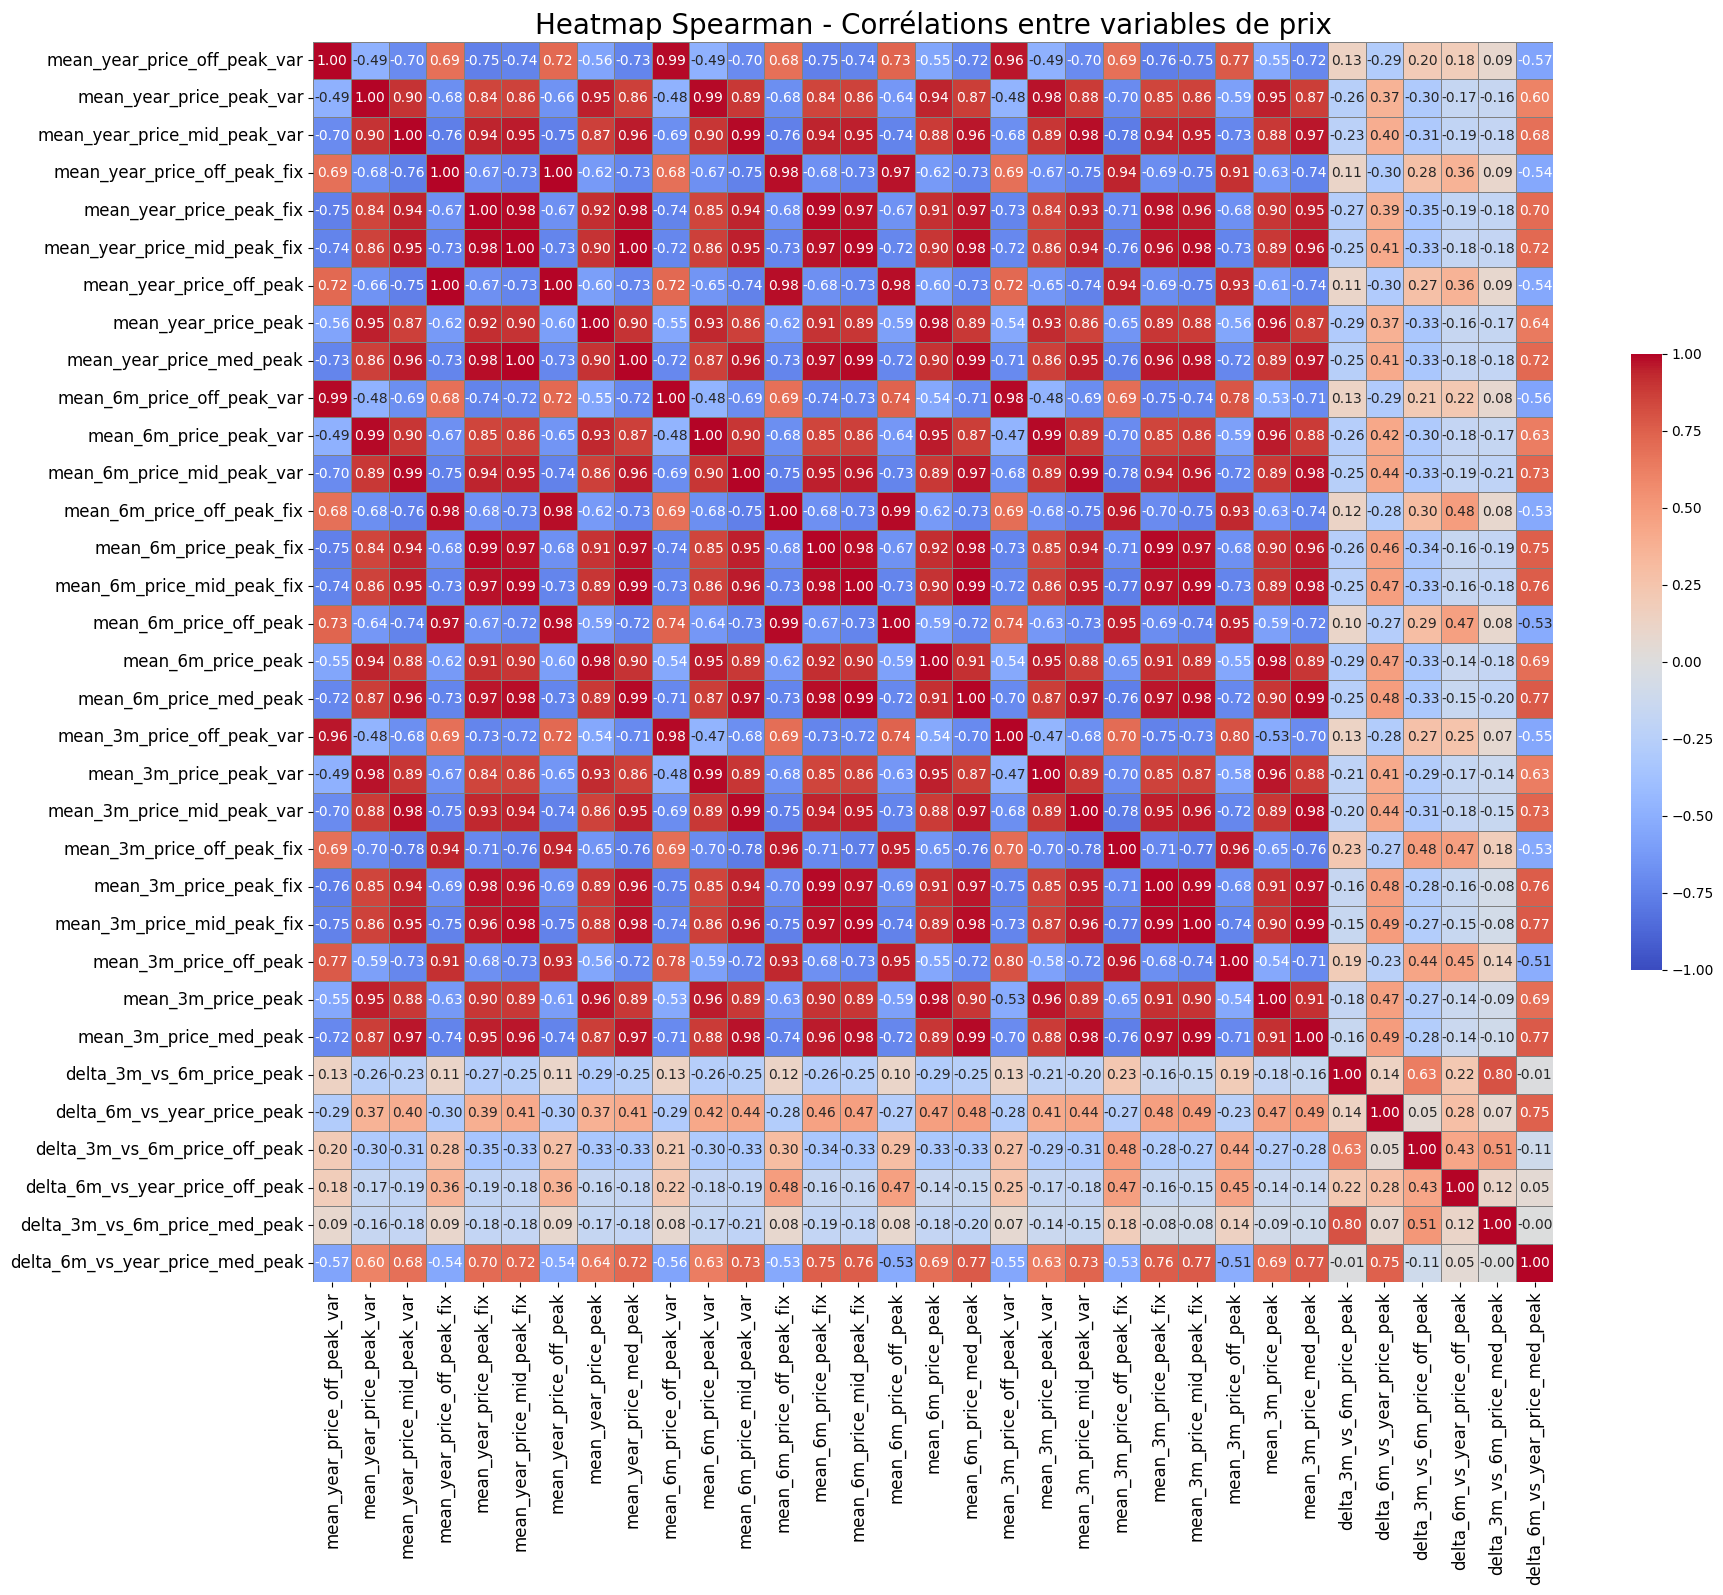

In [196]:
import seaborn as sns

price_cols = ['mean_year_price_off_peak_var', 'mean_year_price_peak_var',
       'mean_year_price_mid_peak_var', 'mean_year_price_off_peak_fix',
       'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
       'mean_year_price_off_peak', 'mean_year_price_peak',
       'mean_year_price_med_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix', 'mean_6m_price_peak_fix',
       'mean_6m_price_mid_peak_fix', 'mean_6m_price_off_peak',
       'mean_6m_price_peak', 'mean_6m_price_med_peak',
       'mean_3m_price_off_peak_var', 'mean_3m_price_peak_var',
       'mean_3m_price_mid_peak_var', 'mean_3m_price_off_peak_fix',
       'mean_3m_price_peak_fix', 'mean_3m_price_mid_peak_fix',
       'mean_3m_price_off_peak', 'mean_3m_price_peak',
       'mean_3m_price_med_peak','delta_3m_vs_6m_price_peak',
       'delta_6m_vs_year_price_peak', 'delta_3m_vs_6m_price_off_peak',
       'delta_6m_vs_year_price_off_peak', 'delta_3m_vs_6m_price_med_peak',
       'delta_6m_vs_year_price_med_peak']

df_price = client[price_cols]

corr_price = df_price.corr(method='spearman')

plt.figure(figsize=(20, 20))
sns.heatmap(corr_price,annot=True,fmt=".2f",cmap="coolwarm",vmin=-1,vmax=1,square=True,linewidths=0.5,linecolor='gray',cbar_kws={"shrink": 0.4})
plt.title("Heatmap Spearman - Corrélations entre variables de prix", fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [197]:
corr_matrix = df_price.corr(method='spearman').abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Highly redundant variables (correlation > {:.2f}) to consider dropping:\n".format(threshold))
for var in to_drop:
    print(var)

to_keep = [col for col in df_price.columns if col not in to_drop]

print("\nVariables to keep for the next steps:\n")
for var in to_keep:
    print(var)

Highly redundant variables (correlation > 0.70) to consider dropping:

mean_year_price_mid_peak_var
mean_year_price_off_peak_fix
mean_year_price_peak_fix
mean_year_price_mid_peak_fix
mean_year_price_off_peak
mean_year_price_peak
mean_year_price_med_peak
mean_6m_price_off_peak_var
mean_6m_price_peak_var
mean_6m_price_mid_peak_var
mean_6m_price_off_peak_fix
mean_6m_price_peak_fix
mean_6m_price_mid_peak_fix
mean_6m_price_off_peak
mean_6m_price_peak
mean_6m_price_med_peak
mean_3m_price_off_peak_var
mean_3m_price_peak_var
mean_3m_price_mid_peak_var
mean_3m_price_off_peak_fix
mean_3m_price_peak_fix
mean_3m_price_mid_peak_fix
mean_3m_price_off_peak
mean_3m_price_peak
mean_3m_price_med_peak
delta_3m_vs_6m_price_med_peak
delta_6m_vs_year_price_med_peak

Variables to keep for the next steps:

mean_year_price_off_peak_var
mean_year_price_peak_var
delta_3m_vs_6m_price_peak
delta_6m_vs_year_price_peak
delta_3m_vs_6m_price_off_peak
delta_6m_vs_year_price_off_peak


##**Why use the Chi-Square (Chi²) Test ?**

The Chi-Square test is used to determine if there is a statistical association between two categorical variables.

In this case, we are analyzing:

- has_gas vs churn

- origin_up vs churn

- channel_sales vs churn

- ERA vs churn

- flag_cross_sell vs churn

Each of these variables is categorical, and churn is also categorical (0 = no churn, 1 = churn).

The Chi-Square test answers the question:

**Are these two categorical variables independent or related ?**

##**When to use Chi-Square Test :**

- Both variables must be categorical.

- Observations must be independent (each client counted only once).

- The expected frequency for each cell should be at least 5.

## **Steps of the Chi-Square Test :**

1. Build a contingency table.
2. Calculate expected frequencies :     
  \begin{equation}
    E(r, c) = \frac{n(r) \times c(r)}{n}
\end{equation}
   - r : row
   - c : column
   - n : corresponding total
3. Calculate the Chi-Square statistic :      
  \begin{equation}
    \chi^2_c = \sum \frac{(O_i - E_i)^2}{E_i}
\end{equation}
   - c : degree of freedom
   - O : Observed Values
   - E : Excpected Values
4. Calculate the p-value :
   The p-value depends on the Chi-Square statistic and the degrees of freedom:

     - Degrees of freedom (dof) = (number of rows - 1) * (number of columns - 1)

5. Interpret the result :

     - If p-value < 0.05 → Reject the null hypothesis → There is a relationship between the variables.

     - If p-value >= 0.05 → Fail to reject → No evidence of a relationship.






In [198]:
client.drop('channel_sales_group',inplace=True,axis=1)

In [200]:
client = client.drop([
    'mean_year_price_mid_peak_var',
    'mean_year_price_off_peak_fix',
    'mean_year_price_peak_fix',
    'mean_year_price_mid_peak_fix',
    'mean_year_price_off_peak',
    'mean_year_price_peak',
    'mean_year_price_med_peak',
    'mean_6m_price_off_peak_var',
    'mean_6m_price_peak_var',
    'mean_6m_price_mid_peak_var',
    'mean_6m_price_off_peak_fix',
    'mean_6m_price_peak_fix',
    'mean_6m_price_mid_peak_fix',
    'mean_6m_price_off_peak',
    'mean_6m_price_peak',
    'mean_6m_price_med_peak',
    'mean_3m_price_off_peak_var',
    'mean_3m_price_peak_var',
    'mean_3m_price_mid_peak_var',
    'mean_3m_price_off_peak_fix',
    'mean_3m_price_peak_fix',
    'mean_3m_price_mid_peak_fix',
    'mean_3m_price_off_peak',
    'mean_3m_price_peak',
    'mean_3m_price_med_peak',
    'delta_3m_vs_6m_price_med_peak',
    'delta_6m_vs_year_price_med_peak'
], axis=1)

In [202]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_variables = [
    'channel_sales',
    'has_gas',
    'origin_up',
    'ERA',
    'flag_cross_sell'
]

results = []

for var in categorical_variables:

    table = pd.crosstab(client[var], client['churn'])

    chi2, p, dof, expected = chi2_contingency(table)

    min_expected = expected.min()

    significant = "✅ Significant" if p < 0.05 else "❌ Not significant"

    results.append({
        "Variable": var,
        "p-value": round(p, 5),
        "Min Expected Frequency": round(min_expected, 2),
        "Significance": significant
    })


chi2_results_df = pd.DataFrame(results)

chi2_results_df = chi2_results_df.sort_values(by="p-value")

from IPython.display import display
display(chi2_results_df)


,Variable,p-value,Min Expected Frequency,Significance
0,channel_sales,0.00,86.43,✅ Significant
2,origin_up,0.00,305.66,✅ Significant
3,ERA,0.00,35.37,✅ Significant
1,has_gas,0.00,256.56,✅ Significant
4,flag_cross_sell,0.04,307.52,✅ Significant


## **Why Use D’Agostino and Pearson Normality Test ?**

Before applying a statistical test (such as t-test or Mann-Whitney U), it is important to know if the data follows a **normal distribution**.

- If the data is normally distributed → we can use **parametric tests**.
- If the data is not normally distributed → we should use **non-parametric tests**.

The **D’Agostino and Pearson test** helps to check if the data is normally distributed by looking at:
- **Skewness** → Is the distribution symmetrical or not?
- **Kurtosis** → Is the distribution too peaked or too flat?

The test combines these two measures and provides a **p-value** which tells us if the distribution is normal.

**How the D’Agostino and Pearson Test Works :**

1. Check data type
  - The test can only be applied to **numerical (continuous or ordinal) variables**.
  - Non-numeric variables are skipped.

2. Check sample size
  - The test requires at least **20 observations** to be reliable.
  - If there are too few observations → the test is not applied.

3. Convert timedeltas if necessary
  - Timedelta variables are converted to seconds so they can be tested.

4. Run the normality test
  - The test calculates the **skewness** and **kurtosis** of the distribution.
  - It combines them into a single test statistic and calculates a **p-value**.

5. Interpret the p-value
  - If **p-value < 0.05** → The distribution is **not normal**.
  - If **p-value >= 0.05** → The distribution is **normal**.



In [204]:
client.drop('date_renewal',inplace=True,axis=1)

In [208]:
from scipy.stats import normaltest

variables = ['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig','pow_max',
       'duration_contract',
       'time_before_modification', 'time_after_modification','erreur_abs_12m','ratio_gas','ratio_marge_cons','ratio_marge_cons',
'ratio_cons_pow_max',
        'mean_year_price_off_peak_var','mean_year_price_peak_var','delta_3m_vs_6m_price_peak','delta_6m_vs_year_price_peak','delta_3m_vs_6m_price_off_peak','delta_6m_vs_year_price_off_peak','ratio_cons_pow_max']

def is_numeric(series):
    return np.issubdtype(series.dtype, np.number) or np.issubdtype(series.dtype, np.timedelta64)

def has_enough_obs(series, min_n=20):
    return series.dropna().shape[0] >= min_n


results = []

for var in variables:
    g0 = client.loc[client.churn == 0, var]
    g1 = client.loc[client.churn == 1, var]

    numeric_ok = is_numeric(g0) and is_numeric(g1)
    size_ok = has_enough_obs(g0) and has_enough_obs(g1)

    if numeric_ok and np.issubdtype(g0.dtype, np.timedelta64):
        g0, g1 = g0.dt.total_seconds(), g1.dt.total_seconds()

    if numeric_ok and size_ok:
        stat0, p0 = normaltest(g0.dropna())
        stat1, p1 = normaltest(g1.dropna())
        status = "normaltest run"
    else:
        p0 = p1 = np.nan
        status = "prerequisites failed"

    results.append({
        "Variable": var,
        "dtype_ok": numeric_ok,
        "size_ok": size_ok,
        "p_value_churn_0": p0,
        "p_value_churn_1": p1,
        "Status": status
    })

df_normaltest = pd.DataFrame(results)



df_normaltest_sorted = df_normaltest.sort_values(by="p_value_churn_1")
display(df_normaltest_sorted)

df_not_normal = df_normaltest[
    (df_normaltest['p_value_churn_0'] > 0.05) | (df_normaltest['p_value_churn_1'] > 0.05)
]

display(df_not_normal)

,Variable,dtype_ok,size_ok,p_value_churn_0,p_value_churn_1,Status
0,cons_12m,True,True,0.00,0.00,normaltest run
1,cons_gas_12m,True,True,0.00,0.00,normaltest run
2,cons_last_month,True,True,0.00,0.00,normaltest run
3,forecast_cons_12m,True,True,0.00,0.00,normaltest run
4,forecast_cons_year,True,True,0.00,0.00,normaltest run
14,net_margin,True,True,0.00,0.00,normaltest run
10,imp_cons,True,True,0.00,0.00,normaltest run
8,forecast_price_energy_peak,True,True,0.00,0.00,normaltest run
24,ratio_cons_pow_max,True,True,0.00,0.00,normaltest run
26,mean_year_price_peak_var,True,True,0.00,0.00,normaltest run


,Variable,dtype_ok,size_ok,p_value_churn_0,p_value_churn_1,Status


### Price Sensitivity Analysis

We conducted a **Mann-Whitney U Test** to analyze price variation deltas and determine if there are significant differences between churned and non-churned clients.  
The following deltas were examined:

- `delta_3m_vs_6m_price_peak`
- `delta_6m_vs_year_price_peak`
- `delta_3m_vs_6m_price_off_peak`
- `delta_6m_vs_year_price_off_peak`

Afterwards, the **Benjamini-Hochberg correction** was applied to adjust for multiple hypothesis testing.

### Corrected P-Values and Interpretation

| Delta                      | Corrected P-Value | Result                                           |
|----------------------------|-------------------|--------------------------------------------------|
| delta_3m_vs_6m_price_peak  | 0.036             | Significant difference even after correction    |
| delta_6m_vs_year_price_peak| 0.767             | NOT significant after correction (likely noise) |
| delta_3m_vs_6m_price_off_peak| 0.036           | Significant difference even after correction    |
| delta_6m_vs_year_price_off_peak| 0.116         | NOT significant after correction (likely noise) |
|mean_year_price_off_peak_var|0.0006658160141198452|Significant difference even after correction
|mean_year_price_peak_var |1.917186295203149e-05|Significant difference even after correction |

###Conclusion

- **Short-term price variations (3m vs 6m)** show statistically significant differences → **indicating price sensitivity** and potential impact on churn.
- **Longer-term price variations (6m vs year)** do **not show significant differences** → they might be noise or have weaker effects on churn.

This analysis will help to:

- Focus on **short-term price dynamics** which seem more relevant to churn prediction.
- Improve **pricing and retention strategies** by targeting sensitive periods.


In [218]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

deltas = [
    'mean_year_price_off_peak_var',
     'mean_year_price_peak_var',
    "delta_3m_vs_6m_price_peak",
    "delta_6m_vs_year_price_peak",
    "delta_3m_vs_6m_price_off_peak",
    "delta_6m_vs_year_price_off_peak",
]

p_values = []
for delta in deltas:
    churn_0 = client[client['churn'] == 0][delta].dropna()
    churn_1 = client[client['churn'] == 1][delta].dropna()

    stat, p = mannwhitneyu(churn_0, churn_1, alternative='two-sided')
    p_values.append(p)

rejected, p_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

for delta, p_corr, reject in zip(deltas, p_corrected, rejected):
    print(f"==== {delta} ====")
    print("Corrected P-value :", p_corr)
    if reject:
        print("➡️  Significant difference even after correction\n")
    else:
        print("➡️  NOT significant after correction (might be noise)\n")

==== mean_year_price_off_peak_var ====
Corrected P-value : 0.0006658160141198452
➡️  Significant difference even after correction

==== mean_year_price_peak_var ====
Corrected P-value : 1.917186295203149e-05
➡️  Significant difference even after correction

==== delta_3m_vs_6m_price_peak ====
Corrected P-value : 0.016529748445485607
➡️  Significant difference even after correction

==== delta_3m_vs_6m_price_off_peak ====
Corrected P-value : 0.018143307929242045
➡️  Significant difference even after correction



In [219]:
client.drop(['delta_6m_vs_year_price_off_peak','delta_6m_vs_year_price_peak'],axis=1,inplace=True)

## **Why Use the Mann-Whitney U Test ?**

In the context of analyzing the **impact of variables on churn**, we have:

- **Two independent groups**:
  - Customers who did **not churn** (`churn = 0`)
  - Customers who **churned** (`churn = 1`)
  
- **Continuous or ordinal variables** (e.g. consumption, contract duration, margins, etc.).


The goal is to test whether the **distributions** of these variables are **statistically different** between the two groups.

**Mann-Whitney U is suitable when** :

- Data is **not normally distributed**.

**Mann-Whitney U Test Calculation Steps :**

- Collect the data :
   - g0 = values for churn = 0
   - g1 = values for churn = 1
- Combine and rank the data
- Calculate the sum of ranks
- Calculate U statistics :      

\begin{equation}
    \begin{aligned}
        U_1 &= n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1 \\
        U_2 &= n_1 n_2 + \frac{n_2 (n_2 + 1)}{2} - R_2
    \end{aligned}
\end{equation}

- Compute the p-value

## **Why Use Benjamini-Hochberg (FDR) Correction ?**

When performing **multiple statistical tests** (in this case, Mann-Whitney U tests for each variable), there is a serious risk of obtaining false positives by chance alone.

If you perform many tests at once:

- The more tests you perform, the higher the chance that **at least one will be statistically significant by random chance** (Type I error).
- For example, testing 20 variables at a significance level of 0.05 may result in 1 false positive on average.

This problem is known as the **multiple comparisons problem**.


**Benjamini-Hochberg (FDR - False Discovery Rate)** is a statistical procedure to correct p-values when performing multiple tests.

The goal is to:

- Control the **expected proportion of false positives** among the rejected hypotheses.
- Adjust the p-values so that the number of false discoveries stays within acceptable limits.

**How Benjamini-Hochberg Works ?**

1. **Sort all p-values** in ascending order.
2. **Calculate the adjusted threshold** for each p-value

 \begin{equation}
    p_{\text{threshold}} = \frac{m}{\text{rank}} \times \alpha
 \end{equation}

- `rank` is the position in the sorted list (1, 2, 3, ...)
- `m` is the total number of tests
- `α` is the chosen significance level (usually 0.05)

3. **Compare the p-value with the threshold**.
   - If p-value ≤ threshold → Reject null hypothesis → **Significant**
   - If p-value > threshold → Do not reject → **Not significant**


## **Why Use Cohen's d ?**

When performing a statistical test (such as Mann-Whitney U), the result gives a **p-value**.  
The p-value tells us **if the difference between two groups is statistically significant**.  

However, statistical significance does **not tell us how large or meaningful** this difference is.  
- A very small difference can be statistically significant if the sample size is large.
- A large difference can be statistically non-significant if the sample size is small.

**This is why we use Cohen's d → to measure the effect size.**

Cohen's d tells us **how big the difference really is**, regardless of sample size.


**Formula for Cohen's d :**

\begin{equation}
    d = \frac{\overline{X}_1 - \overline{X}_0}{\sqrt{\frac{s_0^2 + s_1^2}{2}}}
\end{equation}


\begin{equation}
\bar{X}_1   \text{and} \bar{X}_0 = \text{are the means of churn and non-churn groups}
\end{equation}


\begin{equation}
\frac{s_0^2}{1} = \text{Variances group 0}
\end{equation}

\begin{equation}
\frac{s_1^2}{1} = \text{Variances group 1}
\end{equation}

   - The denominator is the **pooled standard deviation**

**d value :**

 -  0.2     -> Small effect              
 -  0.5    -> Medium effect             
 -  0.8+   -> Large effect              



In [223]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import pandas as pd
import numpy as np

variables = [
    'cons_12m', 'cons_gas_12m', 'cons_last_month',
    'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
    'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
    'num_years_antig', 'net_margin', 'pow_max', 'duration_contract',
    'time_before_modification', 'time_after_modification',
    'ratio_cons_pow_max', 'erreur_abs_12m', 'ratio_gas', 'ratio_marge_cons'
]

results = []

for var in variables:
    g0 = client.loc[client.churn == 0, var].dropna()
    g1 = client.loc[client.churn == 1, var].dropna()

    if np.issubdtype(g0.dtype, np.timedelta64):
        g0, g1 = g0.dt.total_seconds(), g1.dt.total_seconds()

    stat, p = mannwhitneyu(g0, g1, alternative='two-sided')

    pooled_var = (g0.var(ddof=1) + g1.var(ddof=1)) / 2
    d = 0 if pooled_var == 0 else (g1.mean() - g0.mean()) / np.sqrt(pooled_var)

    results.append({
        "Variable": var,
        "p_value": p,
        "Cohen_d": d
    })


df_results = pd.DataFrame(results)

rejected, p_adj, *_ = multipletests(df_results['p_value'], alpha=0.05, method='fdr_bh')
df_results["p_adj"] = p_adj
df_results["Significant"] = rejected

df_significant = df_results[df_results["Significant"]].sort_values(by="p_adj")
df_not_significant = df_results[~df_results["Significant"]].sort_values(by="p_adj")

print("\n===== NON SIGNIFICANT VARIABLES =====")
display(df_not_significant)


===== NON SIGNIFICANT VARIABLES =====


,Variable,p_value,Cohen_d,p_adj,Significant
13,nb_prod_act,0.05,-0.05,0.07,False
18,time_before_modification,0.05,0.02,0.07,False
20,ratio_cons_pow_max,0.08,-0.18,0.11,False
2,cons_last_month,0.12,-0.19,0.16,False
3,forecast_cons_12m,0.37,0.04,0.44,False
10,imp_cons,0.54,-0.01,0.61,False
4,forecast_cons_year,0.57,-0.01,0.62,False
21,erreur_abs_12m,0.63,-0.03,0.66,False
0,cons_12m,0.71,-0.19,0.71,False


In [224]:
vars_to_remove = [
    'nb_prod_act', 'time_before_modification', 'ratio_cons_pow_max',
    'cons_last_month', 'forecast_cons_12m', 'imp_cons',
    'forecast_cons_year', 'erreur_abs_12m', 'cons_12m'
]

client = client.drop(columns=vars_to_remove)

# **Machine Learning Model**

In [234]:
client['has_gas'] = client['has_gas'].map({'f': 0, 't': 1})

## **Why did we use One-Hot Encoding here ?**

In our dataset, several variables are **categorical**:

- `channel_sales`
- `origin_up`
- `ERA`

These variables are **not numerical by nature**. However, machine learning algorithmsexpect input features to be **numerical** in order to process them properly.

### **Why One-Hot Encoding is the right choice ?**

- It **converts each category into a separate binary (0/1) column**, making the data fully numerical.
- It **avoids any ordinal relationship between categories**.


In [230]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

channel_encoded = encoder.fit_transform(client[['channel_sales']])
channel_encoded_df = pd.DataFrame(channel_encoded, columns=encoder.get_feature_names_out(['channel_sales']))

client = pd.concat([client.reset_index(drop=True), channel_encoded_df], axis=1).drop(columns=['channel_sales'])

origin_up_encoded = encoder.fit_transform(client[['origin_up']])
origin_up_encoded_df = pd.DataFrame(origin_up_encoded, columns=encoder.get_feature_names_out(['origin_up']))

client = pd.concat([client.reset_index(drop=True), origin_up_encoded_df], axis=1).drop(columns=['origin_up'])

era_encoded = encoder.fit_transform(client[['ERA']])
era_encoded_df = pd.DataFrame(era_encoded, columns=encoder.get_feature_names_out(['ERA']))

client = pd.concat([client.reset_index(drop=True), era_encoded_df], axis=1).drop(columns=['ERA'])

## **Model Prototyping (Balanced Dataset with SMOTE)**

In real-world datasets, especially in churn prediction, the positive class (churn) is often rare and under-represented.
When training a model directly on such an imbalanced dataset, the model may:

- Learn to predict the majority class (no churn) almost always,

- Achieve high accuracy but fail to identify churn cases,

- Not learn meaningful patterns due to the lack of examples of the minority class.

**SMOTE (Synthetic Minority Oversampling Technique)** is used during prototyping to:

- Balance the dataset → Gives the model enough examples from each class.
- Help the model learn patterns from both churn and non-churn clients.
- Sanity check → Verify that the model is capable of learning something meaningful.

**What do we want to verify during prototyping ?**

- The model can distinguish between churn and non-churn on a balanced dataset.

- Key features have predictive power (feature importance analysis).

- There is no major bug or issue in the preprocessing + training pipeline.

 **Important to note !**

              PROTOTYPING IS NOT FOR PRODUCTION DEPLOYMENT
          
**Metrics from this phase are often over-optimistic because the dataset is artificially balanced.**

The sole purpose is to:

 - **Ensure that the model and pipeline are working properly before moving to real-world testing**

In [250]:
client['churn'].value_counts()

,count
churn,
0,13107
1,1415


In [247]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = client.drop(columns=['churn'])
y = client['churn']

for col in X.columns:
    if np.issubdtype(X[col].dtype, np.timedelta64):
        X[col] = X[col].dt.days

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", y.value_counts().to_dict())
print("Resampled dataset shape:", pd.Series(y_resampled).value_counts().to_dict())

Original dataset shape: {0: 13107, 1: 1415}
Resampled dataset shape: {1: 13107, 0: 13107}


## **XGBoost Model — Prototyping Phase (Balanced Dataset with SMOTE)**

In this experiment, we trained an **XGBoost classifier** on a dataset that was previously balanced using **SMOTE**.  

This approach was designed to quickly validate whether the model is capable of learning meaningful patterns and to check the pipeline functionality.

### Model Performance on Balanced Dataset

- **Training samples**: 18,349
- **Test samples**: 7,865 (balanced after SMOTE)

| Metric     | Score |
|------------|-------|
| AUC        | 0.968 |
| Precision  | 0.964 |
| Recall     | 0.884 |
| F1 Score   | 0.922 |
| Accuracy   | 0.925 |



While these metrics are very high and encouraging, they do **not reflect real-world performance** for two reasons:

1. **The test set itself was balanced using SMOTE.**  
   → In real production environments, churn data is naturally imbalanced.  
   → The model will face far fewer churn cases, which makes the prediction task much harder.

2. **Easy learning scenario.**  
   → With equal amounts of churn and non-churn samples, the model can easily detect patterns.  
   → This makes metrics artificially optimistic.

Objective of this phase :
- **Sanity check**: Make sure the model and pipeline are working.
- **Validate learning capability**: Ensure XGBoost can learn from our dataset.
- **NOT to measure final performance**.

In [248]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

print("Training samples:", X_train_final.shape[0])
print("Test samples:", X_test_final.shape[0])


model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

model.fit(X_train_final, y_train_final)

y_pred_proba = model.predict_proba(X_test_final)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

auc = roc_auc_score(y_test_final, y_pred_proba)
precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)
accuracy = accuracy_score(y_test_final, y_pred)
cm = confusion_matrix(y_test_final, y_pred)

print("\n===== XGBoost Model Metrics =====")
print("AUC       :", auc)
print("Precision :", precision)
print("Recall    :", recall)
print("F1 Score  :", f1)
print("Accuracy  :", accuracy)
print("\nConfusion Matrix:\n", cm)

Training samples: 18349
Test samples: 7865


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



===== XGBoost Model Metrics =====
AUC       : 0.9681015090248954
Precision : 0.9642064372918979
Recall    : 0.8837741607324516
F1 Score  : 0.92223991507431
Accuracy  : 0.9254926891290528

Confusion Matrix:
 [[3804  129]
 [ 457 3475]]


##  **Multi-Model Evaluation — Churn Prediction in Real-World Conditions**


In this phase, the model was trained with **SMOTE applied only on the training set** to help the model learn from a balanced distribution.

However, the **evaluation was done on the original, unbalanced test set**, which reflects the real-world situation where churn cases are much rarer.
ms better than random guessing, its recall is too low to be usable as-is.


In this phase, we evaluated **4 machine learning models** trained with **SMOTE (only on training data)** and tested them on the **original unbalanced test set**, simulating real-world production conditions.  
This allows us to assess their ability to detect churn, a difficult task due to data imbalance.

## Evaluation Summary

| Model         | AUC  | Precision | Recall | F1 Score | Accuracy |
|---------------|------|-----------|--------|----------|----------|
| CatBoost      | 0.65 | 0.13      | 0.74   | 0.22     | 0.47     |
| XGBoost       | 0.66 | 0.16      | 0.50   | 0.24     | 0.69     |
| RandomForest  | 0.67 | 0.23      | 0.20   | 0.21     | 0.86     |
| LightGBM      | 0.67 | 0.35      | 0.11   | 0.17     | 0.89     |

##  Key Observations

- **CatBoost** has the **highest recall (74%)**, but very low precision → Too many false positives → Not ideal alone for production use.
- **XGBoost** offers the **best trade-off** → Good recall (50%) and acceptable precision (16%) → Suitable for churn rescue actions.
- **RandomForest** delivers the **best AUC (0.67)** and better precision (23%) → But recall is low → Too conservative for churn detection.
- **LightGBM** gives the **highest precision (35%)** → But very low recall → Misses too many churners → Not recommended if recall is the priority.

## Conclusion — Best Model for Production ?

- If your priority is to **catch as many churners as possible (Recall priority)**:
  - **XGBoost** → Best balance between recall and precision.

-  **LightGBM** → But not recommended for churn prevention → Too risky to miss churners.

- **CatBoost** → Too aggressive → Can be useful in an ensemble model (Stacking).

- **RandomForest** → Too conservative → Good for stacking, but not standalone.

- **XGBoost should be the model of choice for real-world churn prediction.**



In [254]:
X = client.drop(columns=['churn'])
y = client['churn']


for col in X.columns:
    if np.issubdtype(X[col].dtype, np.timedelta64):
        X[col] = X[col].dt.days

In [276]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("scale_pos_weight (before SMOTE):", scale_pos_weight)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Training samples after SMOTE:", X_train_resampled.shape[0])

models = {
    "XGBoost": xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False,
                                 n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, scale_pos_weight=scale_pos_weight),

    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight='balanced'),

    "LightGBM": lgb.LGBMClassifier(objective='binary', metric='auc', n_estimators=300, learning_rate=0.05,
                                   max_depth=6, random_state=42, class_weight='balanced',verbosity=-1),

    "CatBoost": CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, random_state=42, verbose=0, scale_pos_weight=scale_pos_weight)
}

results = []

for name, model in models.items():

    model.fit(X_train_resampled, y_train_resampled)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy
    })

df_results = pd.DataFrame(results)
print("\n===== Summary of Models =====")
df_results.sort_values(by="Recall", ascending=False)

Training samples: 10165
Test samples: 4357
scale_pos_weight (before SMOTE): 9.267676767676768
Training samples after SMOTE: 18350


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:06:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



===== Summary of Models =====


,Model,AUC,Precision,Recall,F1 Score,Accuracy
3,CatBoost,0.65,0.13,0.74,0.22,0.47
0,XGBoost,0.66,0.16,0.50,0.24,0.69
1,RandomForest,0.67,0.23,0.20,0.21,0.86
2,LightGBM,0.67,0.35,0.11,0.17,0.89


# **Business Case Simulation**

**Model used:** XGBoost  
**Tested on a real, imbalanced dataset (production-like conditions)**

| Metric   | Value |
|----------|-------|
| Recall   | 50 % |
| Precision| 16 % |
| F1 Score | 24 % |
| AUC      | 66 % |

## Simulation on 4 357 customers

- **Estimated churners:** 435 (10 %)
- **Churners detected by the model (50 % recall):** 218
- **Total alerts sent (predicted churn):** 1 362
- **False positives (customers who would not churn):** 1 144
- **True positives (actual churners detected):** 218


## Financial impact

| Item                          | Assumption                       | Calculation | Result |
|-------------------------------|----------------------------------|-------------|--------|
| **Test-set size**             | Given                            | –           | **4 357** customers |
| **True churn rate**           | Hypothesis = 10 %                | 4 357 × 0.10| **435** churners |
| **Model recall**              | 50 % (measured)                  | 435 × 0.50  | **218** churners caught |
| **Model precision**           | 16 % (measured)                  | 218 ÷ 0.16  | **1 362** total alerts |
| **False positives**           | Alerts − True positives          | 1 362 − 218 | **1 144** |
| **Cost per contact**          | €1 (email/SMS/offer)             | 1 362 × €1  | **€1 362** |
| **Annual value per customer** | €500 (CLV)                       | 218 × €500  | **€109 000**<br>*if **100 %** of the 218 stay* |


## Business conclusion

- The model detects **50 % of actual churners** —valuable for retention.  
- Even with false alerts (low precision), the **investment is highly profitable**.  
- Retaining just **10–20 % of the flagged customers** would already cover the campaign cost.

#**Conclusion**

The current model, although better than random guessing, is not ready for real-world deployment in its current state.

**Recommendations for Improvement**

Feature Engineering (critical priority)

Add more churn-relevant features:

- Customer engagement (login frequency, activity patterns)

- Support tickets / complaints

- Payment issues

→ Churn prediction strongly depends on behavioral signals → enrich the dataset.
